In [ ]:
!pip install pandas
!pip install geopandas
!pip install seaborn
!pip install matplot
!pip install numpy
!pip install pysal

     |████████████████████████████████| 1.0 MB 30.4 MB/s 
     |████████████████████████████████| 6.3 MB 54.0 MB/s 
     |████████████████████████████████| 16.7 MB 53.5 MB/s 
     |████████████████████████████████| 60 kB 4.9 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 78 kB 5.7 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 138 kB 42.5 MB/s 
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 3.6 MB 54.6 MB/s 
  Created wheel for SimpleWebSocketServer: filename=SimpleWebSocketServer-0.1.1-py3-none-any.whl size=9492 sha256=e188569fc91d4ed6cc4a18718512c2060b4f6f3cb046c9fffc8d90a532bdabaf
  Stored in directory: /root/.cache/pip/wheels/6f/63/c0/9f45bae84b1cb10177012cc98786d017338ff1a458536a15b6
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=

     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 243 kB 50.9 MB/s 
     |████████████████████████████████| 209 kB 53.4 MB/s 
     |████████████████████████████████| 164 kB 54.4 MB/s 
     |████████████████████████████████| 2.4 MB 50.3 MB/s 
     |████████████████████████████████| 60 kB 7.4 MB/s 
     |████████████████████████████████| 81 kB 9.1 MB/s 
     |████████████████████████████████| 41 kB 593 kB/s 
     |████████████████████████████████| 95 kB 3.6 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 5.7 MB 40.0 MB/s 
     |████████████████████████████████| 269 kB 55.3 MB/s 
     |████████████████████████████████| 2.1 MB 38.8 MB/s 
     |████████████████████████████████| 66.6 MB 1.2 MB/s 
     |████████████████████████████████| 77 kB 5.1 MB/s 
     |████████████████████████████████| 183 kB 65.3 MB/s 
     |████████████████████████████████| 994 kB 48.9 MB/s 
     |██████████████████████

In [ ]:
%matplotlib inline

import geopandas
from pysal.lib import examples
import seaborn as sns
import pandas as pd
from pysal.viz import mapclassify
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
examples.explain("mexico")

mexico

Decennial per capita incomes of Mexican states 1940-2000
--------------------------------------------------------

* mexico.csv: attribute data. (n=32, k=13)
* mexico.gal: spatial weights in GAL format.
* mexicojoin.shp: Polygon shapefile. (n=32)

Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.



In [ ]:
mx = examples.load_example("mexico")

In [ ]:
mx.get_file_list()

['/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexicojoin.prj',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/README.md',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexicojoin.shp',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexico.csv',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexico.gal',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexicojoin.dbf',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexicojoin.shx']

In [ ]:
db = geopandas.read_file(examples.get_path("mexicojoin.shp"))

In [ ]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   POLY_ID     32 non-null     int64   
 1   AREA        32 non-null     float64 
 2   CODE        32 non-null     object  
 3   NAME        32 non-null     object  
 4   PERIMETER   32 non-null     float64 
 5   ACRES       32 non-null     float64 
 6   HECTARES    32 non-null     float64 
 7   PCGDP1940   32 non-null     float64 
 8   PCGDP1950   32 non-null     float64 
 9   PCGDP1960   32 non-null     float64 
 10  PCGDP1970   32 non-null     float64 
 11  PCGDP1980   32 non-null     float64 
 12  PCGDP1990   32 non-null     float64 
 13  PCGDP2000   32 non-null     float64 
 14  HANSON03    32 non-null     float64 
 15  HANSON98    32 non-null     float64 
 16  ESQUIVEL99  32 non-null     float64 
 17  INEGI       32 non-null     float64 
 18  INEGI2      32 non-null     float64 
 19  MA

In [ ]:
db.crs

In [ ]:
db.crs = "EPSG:4326"
db.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

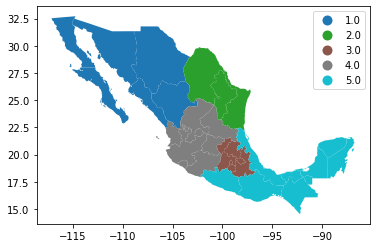

In [ ]:
db.plot(
    column="INEGI", 
    categorical=True, 
    legend=True
)

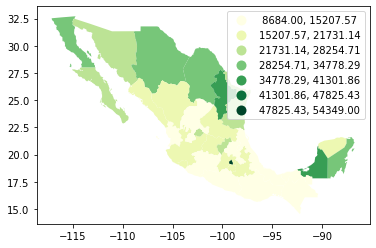

In [ ]:
db.plot(
    column="PCGDP2000", 
    scheme="equal_interval", 
    k=7,
    cmap="YlGn",
    legend=True
)

In [ ]:
classi = mapclassify.EqualInterval(db["PCGDP2000"], k=7)
classi

EqualInterval               

      Interval         Count
----------------------------
[ 8684.00, 15207.57] |    10
(15207.57, 21731.14] |    10
(21731.14, 28254.71] |     5
(28254.71, 34778.29] |     4
(34778.29, 41301.86] |     2
(41301.86, 47825.43] |     0
(47825.43, 54349.00] |     1

In [ ]:
classi.bins

array([15207.57142857, 21731.14285714, 28254.71428571, 34778.28571429,
       41301.85714286, 47825.42857143, 54349.        ])

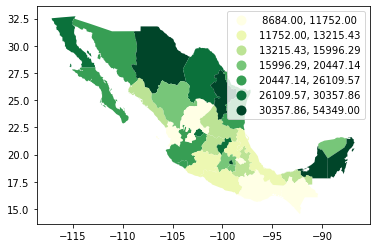

In [ ]:
db.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend=True
)

In [ ]:
classi = mapclassify.Quantiles(db["PCGDP2000"], k=7)
classi

Quantiles                   

      Interval         Count
----------------------------
[ 8684.00, 11752.00] |     5
(11752.00, 13215.43] |     4
(13215.43, 15996.29] |     5
(15996.29, 20447.14] |     4
(20447.14, 26109.57] |     5
(26109.57, 30357.86] |     4
(30357.86, 54349.00] |     5

In [ ]:
classi.bins

array([11752.        , 13215.42857143, 15996.28571429, 20447.14285714,
       26109.57142857, 30357.85714286, 54349.        ])

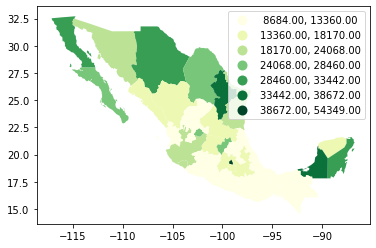

In [ ]:
db.plot(
    column="PCGDP2000", 
    scheme="fisher_jenks", 
    k=7,
    cmap="YlGn",
    legend=True
)

In [ ]:
classi = mapclassify.FisherJenks(db["PCGDP2000"], k=7)
classi

FisherJenks                 

      Interval         Count
----------------------------
[ 8684.00, 13360.00] |    10
(13360.00, 18170.00] |     8
(18170.00, 24068.00] |     4
(24068.00, 28460.00] |     4
(28460.00, 33442.00] |     3
(33442.00, 38672.00] |     2
(38672.00, 54349.00] |     1

In [ ]:
classi.bins

array([13360., 18170., 24068., 28460., 33442., 38672., 54349.])

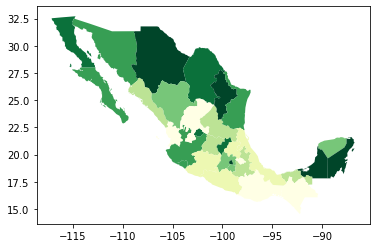

In [ ]:
db.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend=False
)

(-102.0, -97.0)

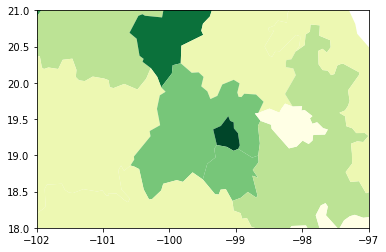

In [ ]:
# Setup the figure
f, ax = plt.subplots(1)
# Draw the choropleth
db.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend=False,
    ax=ax
)
# Redimensionate X and Y axes to desired bounds
ax.set_ylim(18, 21)
ax.set_xlim(-102, -97)

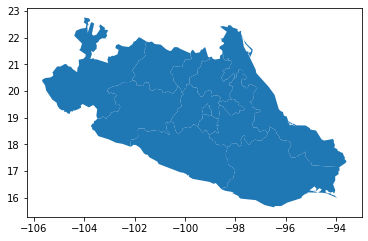

In [ ]:
subset = db.cx[-102:-97, 18:21]
subset.plot()

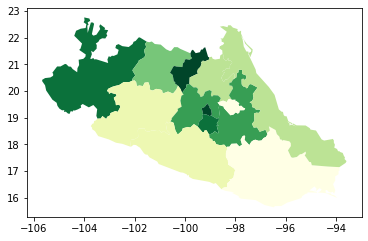

In [ ]:
subset.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend=False
)

In [ ]:
import geopandas
lsoas = geopandas.read_file("/content/E08000012.shp")

In [ ]:
import pandas
ahah_data = pandas.read_csv("/content/E08000012.csv")

In [ ]:
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")

In [ ]:
db.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
db.crs = "EPSG:4326"
db.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

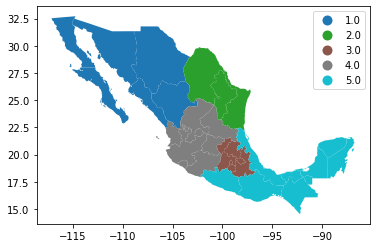

In [ ]:
db.plot(
    column="INEGI",
    categorical = "True",
    legend = "True"
)

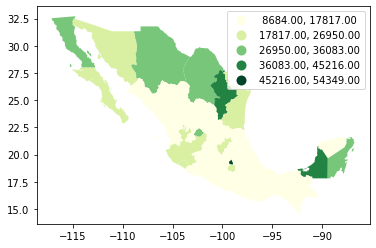

In [ ]:
db.plot(
    column = "PCGDP2000",
    scheme = "equal_interval",
    k = 5,
    cmap = "YlGn",
    legend = "True"
)

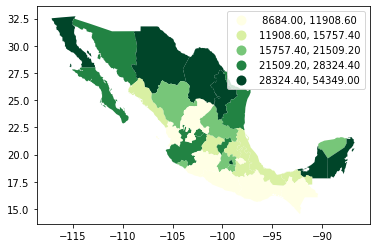

In [ ]:
db.plot(
    column = "PCGDP2000",
    scheme = "quantiles",
    k = 5,
    cmap = "YlGn",
    legend = "True"
)

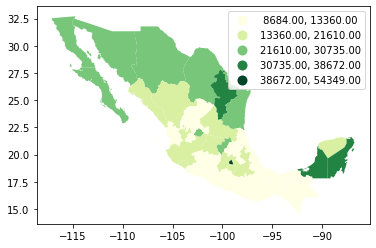

In [ ]:
db.plot(
    column = "PCGDP2000",
    scheme = "Fisher_Jenks",
    k = 5,
    cmap = "YlGn",
    legend = "True"
)

In [ ]:
classi = mapclassify.EqualInterval(db["PCGDP2000"], k=2)
classi

EqualInterval               

      Interval         Count
----------------------------
[ 8684.00, 31516.50] |    28
(31516.50, 54349.00] |     4

In [ ]:
above_or_below = mapclassify.EqualInterval(db["PCGDP2000"], k=2)
above_or_below.head()
db['above_or_below'] = above_or_below
db.head()


AttributeError: ignored

(-105.0, -100.0)

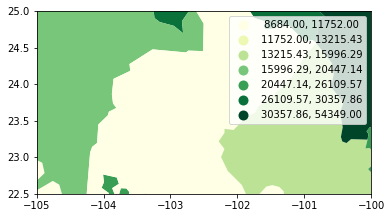

In [ ]:
f, ax = plt.subplots(1)
db.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend="True",
    ax=ax
)
ax.set_ylim(22.5, 25)
ax.set_xlim(-105, -100)

(-100.0, -95.0)

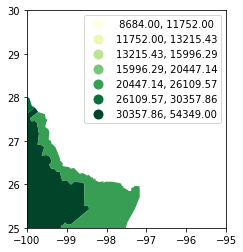

In [ ]:
f, ax = plt.subplots(1)
db.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend="True",
    ax=ax
)
ax.set_ylim(25, 30)
ax.set_xlim(-100, -95)